# Klustring av blodtrycksdata i 3 grupper

Exempeldata hämtat från [följande länk](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_BiostatisticsBasics/BS704_BiostatisticsBasics3.html)

Vi kommer läsa in lite exempeldata, komplettera med egna mätningar, räkna ut 3 st centroider för dessa data (k-means-kluster), samt visa upp data i relation till de beräknade grupperna. Grupperna kan symbolisera genomsnittet för de med låga, medel eller höga siffror. 

**Obs! Notera att _detta är ett exempel på att bearbeta hälsodata_, inte ett sätt att ställa diagnos eller förutse någon persons hälsa.**

## 1. Hämta pandas-modulen och läs in data från CSV-fil
1. Modulen pandas använder vi för att bearbeta data.
2. Vi har lite exempel på blodtrycksdata i en textfile (CSV) som vi läser in.
3. Vi ber att få lite information om den data vi just läst in.

In [1]:
import pandas as pd 

bt = pd.read_csv('../data/blodtryck.csv', sep=';')

bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
Participant ID              10 non-null int64
Systolic Blood Pressure     10 non-null int64
Diastolic Blood Pressure    10 non-null int64
Total Serum Cholesterol     10 non-null int64
 Weight                     10 non-null int64
 Height                     10 non-null float64
 Body Mass Index            10 non-null float64
dtypes: float64(2), int64(5)
memory usage: 640.0 bytes


## 2. Titta på våra data
1. Vi väljer ut de kolumner med data som vi tycker det är intressant att jobba med, det diastoliska och systoliska trycket.
2. Kompletterar med egna mätningar.
3. Slår samman de inlästa mätningarna från CSV-filen och de egna mätningarna.
4. Visar upp 'X'

In [2]:
extract = bt[['Diastolic Blood Pressure', 'Systolic Blood Pressure']]
egna_matningar = pd.DataFrame([[75, 110], [80, 110], [80, 160], [71, 100], [70, 115], [70, 115], [65, 120], [90, 130], [40, 140], [70, 120], [85, 145], [65, 120], [90, 140], [95, 130]], columns=['Diastolic Blood Pressure', 'Systolic Blood Pressure'])
X = pd.concat([extract, egna_matningar])
X

,Diastolic Blood Pressure,Systolic Blood Pressure
0,76,141
1,64,119
2,62,122
3,81,127
4,70,125
5,72,123
6,81,105
7,63,113
8,67,106
9,77,131


## 3. Beräknar kluster (Unsupervised machine learning)
1. Hämtar in extern modul för machine learning - KMeans.
2. Skriver ut antalet mätvärden, vi började med 10 st i CSV-filen.
3. Använder [K-means klustring](https://en.wikipedia.org/wiki/K-means_clustering) för att gruppera data i 3 st grupper.
4. Skriver ut det genomsnittliga värdet för varje grupp/kluster, ett kluster per rad.

In [3]:
from sklearn.cluster import KMeans
print('Antal mätningar:', len(X))

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
centrum = kmeans.cluster_centers_
centrum

Antal mätningar: 24


array([[ 84.25      , 138.        ],
       [ 69.66666667, 114.86666667],
       [ 40.        , 140.        ]])

## 4. Visualisera data och beräknade kluster
1. Hämta in moduler
2. Rita diagram för alla data
3. Rita diagram för var centrum är för våra beräknade kluster.

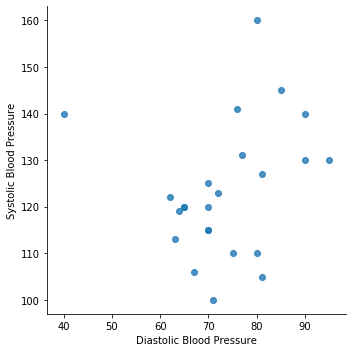

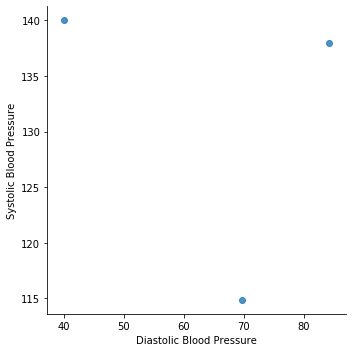

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot('Diastolic Blood Pressure', 'Systolic Blood Pressure', data=X, fit_reg=False)

centrum_dataset = pd.DataFrame({'Diastolic Blood Pressure':centrum[:,0],'Systolic Blood Pressure':centrum[:,1]})
sns.lmplot('Diastolic Blood Pressure', 'Systolic Blood Pressure', data=centrum_dataset, fit_reg=False)